# Contents of this notebook:
- Read and plot the residuals from the IIEOUT file
  - residual summaries by station
  - observation residuals




## Import relevant packages and identify the data location 

In [24]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [25]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import os.path


In [27]:
# import sys  
# sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/')
# /content/drive/My Drive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/iieout
# /content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/ISS_GPS/adding_resid_orbit_printout
# runs_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/adding_resid_orbit_printout/'
# file = runs_path + 'iieout'


local_path = '/content/drive/MyDrive/GEODYN-KAMODO Project/notebooks/ISS_GPS_analysis/'

path_to_data = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/'

msis86_path = path_to_data + 'MSIS86_run/'
iieout_file_86    = msis86_path + 'iieout'
print(os.path.isfile(iieout_file_86) )

# jacchia71_path = path_to_data + 'DTM_run/'
# iieout_file_71    = jacchia71_path + 'iieout'
# print(os.path.isfile(iieout_file_71) )

# DTM87_path = path_to_data + 'Jacchia_run/'
# iieout_file_87    = DTM87_path + 'iieout'
# print(os.path.isfile(iieout_file_87) )


True


## Read in the IIEOUT file  Residuals



In [30]:
iieout_file = iieout_file_86
print(iieout_file)
os.path.isfile(iieout_file) 


/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/MSIS86_run/iieout


True

### Important:  First, how many iterations of the orbit are there?



In [31]:
text = 'CONVERGENCE'
# line_nos = []

with open(iieout_file, 'r') as f:
        for line_no, line in enumerate(f):
            if text in line:
              line_text = line
              print(line)

              # line_nos.append(line_no)
            

 CONVERGENCE WITHIN  2.0 PERCENT AFTER  7 ITERATIONS



In [6]:
num_iters = float(line_text[39:42])-1
num_iters

6.0

#### Method:
- Search through the IIEOUT file for key phrases (**Section Headers of Sorts**)
- Read in the data after the section header
  - some manual double-checking is required that this is done correctly

#### Section Header Options:
this depends on what iieout was sent (*still trying to figure this out*)
- RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  1 OF GLOBAL ITERATION 1
- RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  1 OF GLOBAL ITERATION 1
- OBSERVATION RESIDUALS FOR ARC  1 FOR INNER ITERATION  





#### **Issue to be aware of:**
- Format of the IIEOUT file is correct 
    - specifically, be sure that the columns being read in are correct in the pd.read_csv()
    - If all IIEOUT files are different, these functions may not be able to be universally used.  Some modifcation may be required

##### Functions:


In [7]:
def search_iiesout_line_numbers(iieout_file, text_1, text_2):
  '''
  Pupose:
  This function loops thru every line of the IIEOUT file and finds
  the line numbers that contain the text provided.
  The provided text will be the Section Headers
  '''
  line_no_1 = []
  line_no_2 = []

  with open(iieout_file, 'r') as f:
        for line_no, line in enumerate(f):
            if text_1 in line:
              # print(line_no)
              line_no_1.append(line_no)
            if text_2 in line:
              # print(line_no)
              line_no_2.append(line_no)

  # print(line_no_1,line_no_2)
    
  return(line_no_1[0], line_no_2[0])    
    


def create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2):

  '''
  Pupose:
  This calls the search_iiesout_line_numbers() to locate the location of the 
  section header then reads in the data as a pandas CSV.
  The CSV is then converted to a pd.DataFrame and any rows that do not contain 
  the data are removed.
  '''

  ARC_1_INNER_ITERATION_1_OFGLOBAL_1 = pd.read_csv(iieout_file, 
                                        skiprows = line_no_1+1+1 , 
                                          nrows =  int((line_no_2 - line_no_1) /2)-1,
                              names = ['Number', 
                                      'Mean',
                                      'RMS',
                                      'No.-WTD',
                                      'WTD-MEAN',
                                      'WTD-RMS',
                                      'WTD-RND',
                                      'TYPE_1',
                                      'TYPE_2',
                                      'TYPE_3',
                                      'CONFIG'],
                              sep = '\s+',
                              )

  A = ARC_1_INNER_ITERATION_1_OFGLOBAL_1
  A = pd.DataFrame(A)

  for index, row in A.iterrows():
      try:
  #         print( (row['Mean']),'\n')
          float(row['Mean'])
          if abs(float(row['Mean'])) > 10000 :
              A=A.drop(index)
          else:
              continue
  #             print('All good here')
      except:
  #         print('Cant Be converted to float')
          A=A.drop(index) 
  return(A)

#### Residuals by Station

- Denoted by: RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC 1 INNER ITERATION 1 OF GLOBAL ITERATION 1
- This section is ended at each iteration when the MEASUREMENT section begins



In [8]:
iteration = np.str(1)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter1 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)
ResSum_station_iter1

,Number,Mean,RMS,No.-WTD,WTD-MEAN,WTD-RMS,WTD-RND,TYPE_1,TYPE_2,TYPE_3,CONFIG
4,117,0.0011,0.0075,117,0.0000,0.0000,608.0080,PCE,Z,T.O.R.,6163016
5,117,-0.0319,0.1665,117,-0.0000,0.0000,3701.0377,PCE,Y,T.O.R.,6163016
6,117,0.0220,0.1525,117,0.0000,0.0000,2629.6794,PCE,X,T.O.R.,6163016
7,117,-0.0003,0.0077,117,-0.0000,0.0000,236.9511,PCE,Z,T.O.R.,5461024
8,117,0.0084,0.1537,117,0.0000,0.0000,2717.3299,PCE,Y,T.O.R.,5461024
...,...,...,...,...,...,...,...,...,...,...,...
98,117,-0.0396,0.1718,117,-0.0000,0.0000,3615.9647,PCE,Y,T.O.R.,6468096
99,117,-0.0080,0.1515,117,-0.0000,0.0000,2946.5296,PCE,X,T.O.R.,6468096
100,117,0.0022,0.0078,117,0.0000,0.0000,159.9451,PCE,Z,T.O.R.,6573106
101,117,0.0246,0.1529,117,0.0000,0.0000,3291.0922,PCE,Y,T.O.R.,6573106


In [9]:
iteration = np.str(2)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter2 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [10]:
iteration = np.str(3)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter3 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [11]:
iteration = np.str(4)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

# text_1
line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter4 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [12]:
iteration = np.str(5)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

# text_1
line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter5 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


In [13]:
iteration = np.str(6)
text_1 = 'RESIDUAL SUMMARY BY STATION AND TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
text_2 = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'

# text_1
line_no_1, line_no_2 = search_iiesout_line_numbers(iieout_file, text_1, text_2)

ResSum_station_iter6 = create_df_ResidualSummaryByStation(iieout_file, line_no_1, line_no_2)


##### Plot Residuals by Station


In [14]:
A = ResSum_station_iter1
B = ResSum_station_iter2
C = ResSum_station_iter3
D = ResSum_station_iter4
E = ResSum_station_iter5
F = ResSum_station_iter6

full_mean = pd.concat([ResSum_station_iter1.Mean,
                  ResSum_station_iter2.Mean,
                  ResSum_station_iter3.Mean,
                  ResSum_station_iter4.Mean,
                  ResSum_station_iter5.Mean,
                  ResSum_station_iter6.Mean])

full_RMS = pd.concat([ResSum_station_iter1.RMS,
                  ResSum_station_iter2.RMS,
                  ResSum_station_iter3.RMS,
                  ResSum_station_iter4.RMS,
                  ResSum_station_iter5.RMS,
                  ResSum_station_iter6.RMS])
# 'No.-WTD','WTD-MEAN','WTD-RMS','WTD-RND',
full_no_wtd = pd.concat([ResSum_station_iter1['No.-WTD'],
                         ResSum_station_iter2['No.-WTD'],
                         ResSum_station_iter3['No.-WTD'],
                         ResSum_station_iter4['No.-WTD'],
                         ResSum_station_iter5['No.-WTD'],
                         ResSum_station_iter6['No.-WTD']])
full_wtdmean = pd.concat([ResSum_station_iter1['WTD-MEAN'],
                          ResSum_station_iter2['WTD-MEAN'],
                          ResSum_station_iter3['WTD-MEAN'],
                          ResSum_station_iter4['WTD-MEAN'],
                          ResSum_station_iter5['WTD-MEAN'],
                          ResSum_station_iter6['WTD-MEAN']])
full_wtdrms = pd.concat([ResSum_station_iter1['WTD-RMS'],
                         ResSum_station_iter2['WTD-RMS'],
                         ResSum_station_iter3['WTD-RMS'],
                         ResSum_station_iter4['WTD-RMS'],
                         ResSum_station_iter5['WTD-RMS'],
                         ResSum_station_iter6['WTD-RMS']])

full_wtdrnd = pd.concat([ResSum_station_iter1['WTD-RND'],
                         ResSum_station_iter2['WTD-RND'],
                         ResSum_station_iter3['WTD-RND'],
                         ResSum_station_iter4['WTD-RND'],
                         ResSum_station_iter5['WTD-RND'],
                         ResSum_station_iter6['WTD-RND']])


'''
 Below code removes some extraneous
 strings that were put into the 
 WTD-RND and caused some errors
'''
remove_strings = []
for x in full_wtdrnd.values:
    try:
        a = float(x)
        remove_strings.append(a)
    except:
        a = np.nan
        remove_strings.append(a)
full_wtdrnd = pd.Series(remove_strings)

In [15]:
# for i,val in enumerate(full_mean):
#   print(i,val)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


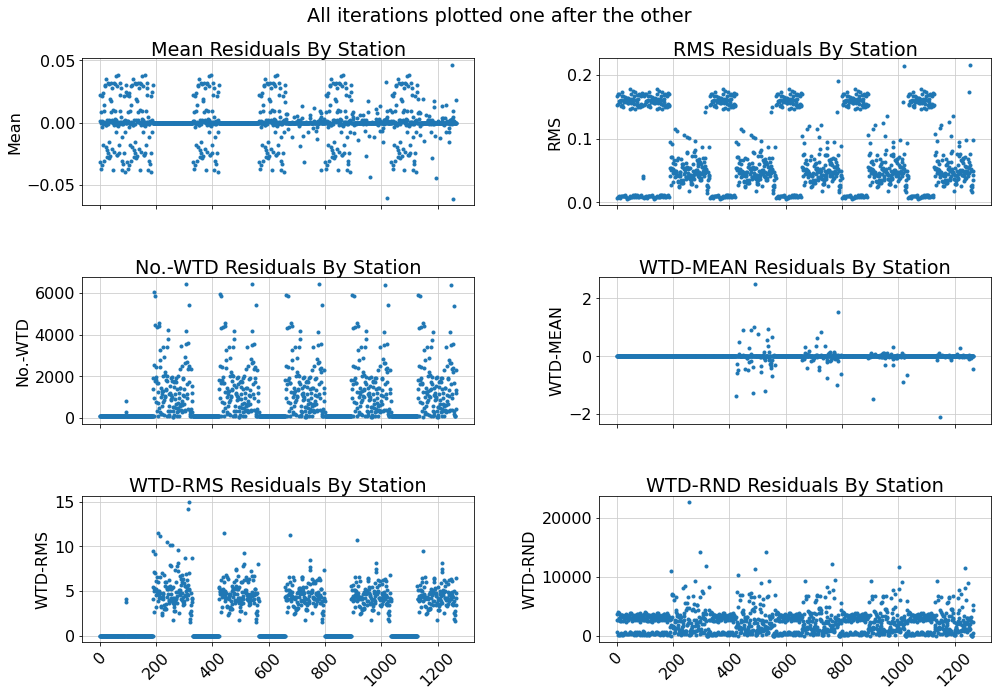

In [16]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax ) = plt.subplots(3,2, figsize=(15,10), sharex=True)
fig.suptitle('All iterations plotted one after the other')
ax[0,0].set_title('Mean Residuals By Station')
ax[0,0].plot(np.arange(0, np.size(full_mean)), full_mean.astype(float) ,'.')
ax[0,0].set(ylabel=  'Mean')  

ax[0,1].set_title('RMS Residuals By Station')
ax[0,1].plot(np.arange(0, np.size(full_RMS)),full_RMS.astype(float) ,'.')
ax[0,1].set(ylabel=  'RMS')  

ax[1,0].set_title('No.-WTD Residuals By Station')
ax[1,0].plot(np.arange(0, np.size(full_no_wtd)),full_no_wtd.astype(float) ,'.')
ax[1,0].set(ylabel=  'No.-WTD')  

ax[1,1].set_title('WTD-MEAN Residuals By Station')
ax[1,1].plot(np.arange(0, np.size(full_wtdmean)),full_wtdmean.astype(float) ,'.')
ax[1,1].set(ylabel=  'WTD-MEAN')  

ax[2,0].set_title('WTD-RMS Residuals By Station')
ax[2,0].plot(np.arange(0, np.size(full_wtdrms)),full_wtdrms.astype(float) ,'.')
ax[2,0].set(ylabel=  'WTD-RMS')  

ax[2,1].set_title('WTD-RND Residuals By Station')
ax[2,1].plot(np.arange(0, np.size(full_wtdrnd)),full_wtdrnd.astype(float) ,'.')
ax[2,1].set(ylabel=  'WTD-RND')  


fig.tight_layout( pad=3.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/Residual_Summary_Station1.png")   
    

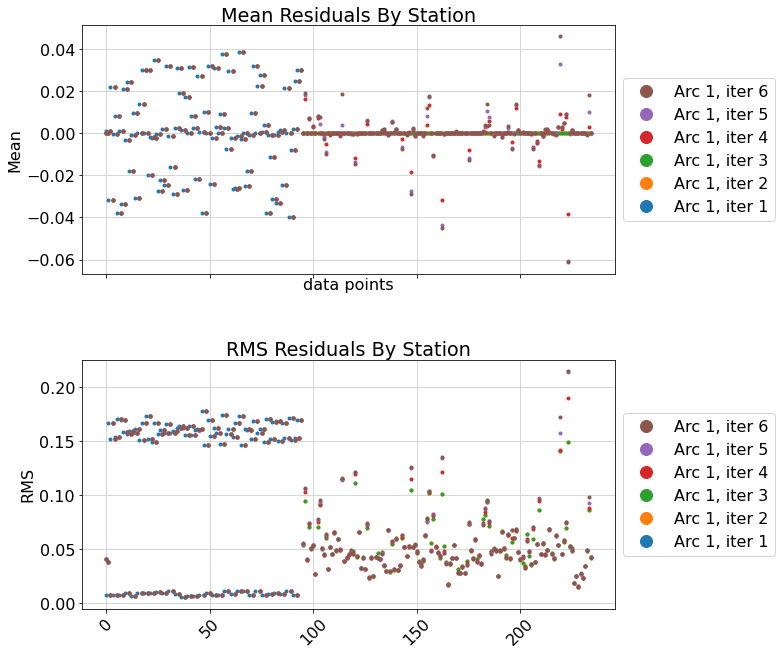

In [17]:

mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)
ax1.set_title('Mean Residuals By Station')
ax1.plot(np.arange(0, np.size(A.Mean)),A.Mean.astype(float) ,'.', label = 'Arc 1, iter 1')
ax1.plot(np.arange(0, np.size(B.Mean)),B.Mean.astype(float) ,'.', label = 'Arc 1, iter 2')
ax1.plot(np.arange(0, np.size(C.Mean)),C.Mean.astype(float) ,'.', label = 'Arc 1, iter 3')
ax1.plot(np.arange(0, np.size(D.Mean)),D.Mean.astype(float) ,'.', label = 'Arc 1, iter 4')
ax1.plot(np.arange(0, np.size(E.Mean)),E.Mean.astype(float) ,'.', label = 'Arc 1, iter 5')
ax1.plot(np.arange(0, np.size(F.Mean)),F.Mean.astype(float) ,'.', label = 'Arc 1, iter 6')
ax1.set(ylabel=  'Mean')  

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )
ax2.set_title('RMS Residuals By Station')
ax2.plot(np.arange(0, np.size(A.RMS)),A.RMS.astype(float) , '.', label = 'Arc 1, iter 1' )
ax2.plot(np.arange(0, np.size(B.RMS)),B.RMS.astype(float) , '.', label = 'Arc 1, iter 2' )
ax2.plot(np.arange(0, np.size(C.RMS)),C.RMS.astype(float) , '.', label = 'Arc 1, iter 3' )
ax2.plot(np.arange(0, np.size(D.RMS)),D.RMS.astype(float) , '.', label = 'Arc 1, iter 4' )
ax2.plot(np.arange(0, np.size(E.RMS)),E.RMS.astype(float) , '.', label = 'Arc 1, iter 5' )
ax2.plot(np.arange(0, np.size(F.RMS)),F.RMS.astype(float) , '.', label = 'Arc 1, iter 6' )
ax2.set(ylabel=  'RMS')  

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )


ax1.set(xlabel= 'data points') 

fig.tight_layout( pad=3.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/Residual_Summary_Station2.png")  
    


#### Residuals By Observation

##### Functions:

- for the starlette example there are only observation for iteration 1 and iteration 5 (end)
- the number of observation is found in the "RESIDUAL SUMMARY BY MEASUREMENT" section






### The plot thickens: 
- these are residuals based on the Station- Satellite configuration
- Our satellite is 9806701 (ISS)



## What satellites are in the file:


In [18]:
# find the satellites in the GEODYN Run:

text="STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701"
allsats = []
with open(iieout_file, 'r') as f:

  for line_no, line in enumerate(f):
      if text in line:
        # print(line[90:100])
        allsats.append(int(line[70:81]) )
        print(line)
        
  #         line_no_1 =lines_list 

SatIDs = []
for sat in allsats:
    if sat not in SatIDs:
        SatIDs.append(sat)

Streaming output truncated to the last 5000 lines.
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6572086           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6468096           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5356164           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6366276           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6572086           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6468096           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5356164           5848075                      (*NEW*)

  STATION-SATELLITE CONFIGURATION  DSS1WRNG          

In [19]:
text_obs_resid = 'OBSERVATION RESIDUALS FOR ARC  1 FOR INNER ITERATION  '+ (iteration)


In [20]:
  lines_list = [] #np.empty(np.size(num_observations))
  with open(iieout_file, 'r') as f:

      for line_no, line in enumerate(f):
          if text_obs_resid in line:
  #                 print(line_no)
              lines_list.append(line_no)
  #         line_no_1 =lines_list 

  # lines = search_iiesout_all_line_numbers(iieout_file, text)
  line_no_1 = lines_list[0]
  line_no_2 = lines_list[-1]

# find the satellites in the GEODYN Run:

text="STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701"
allsats = []
with open(iieout_file, 'r') as f:

    for line_no, line in enumerate(f):
      if text in line:
        # print(line[90:100])
        allsats.append(int(line[70:81]) )
        # print(line)
      
#         line_no_1 =lines_list 

SatIDs = []
for sat in allsats:
    if sat not in SatIDs:
        SatIDs.append(sat)

In [21]:
line_no_2

2762833

In [22]:
len(SatIDs)

31

- We will need to locate Iteration 6 residuals in the file
- then go through each satellite and collect the residuals chronologically
- we can then plot out the residuals by satellite
- 

In [23]:
# def read_obs_residuals(iieout_file, iteration, VERBOSE_timer):
iteration = '6'
VERBOSE_timer = True


if VERBOSE_timer == True:
  import time
  start = time.time()
else:
  pass

#-------------------------------------------------------------------------------

#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
'''
  Now find all the instances of the OBSERVATION RESIDUALS 
  header at this iteration.  These are stored in a list.
'''
lines_list = [] #np.empty(np.size(num_observations))
with open(iieout_file, 'r') as f:

    for line_no, line in enumerate(f):
        if text_obs_resid in line:
#                 print(line_no)
            lines_list.append(line_no)
#         line_no_1 =lines_list 

import time
start = time.time()

init_df = pd.DataFrame(data={'YYMMDD'   :[],
                        'HHMM'    :[],
                        'Sec-UTC-R' :[],
                        'Observation'       :[],
                        'Residual'       :[],
                        'Ratio to sigma'       :[],
                        'Elev1'    :[],
                        'Elev2'    :[],
                        'OBS No.'    :[],
                        'Block'     :[],})

dict_sat = {}
for i in SatIDs:
  dict_sat[i]= init_df



for i,iline in enumerate(lines_list):

  with open(iieout_file, 'r') as f: 
    for _ in range(iline+1): 
        f.readline() 
    line = f.readline()
    sat_line = int(line[70:81])   #int(line[90:100])
    print(line)
    print(sat_line)

  RESID_OBSERV = pd.read_csv(iieout_file, 
                                      skiprows = lines_list[0] + 6 , 
                                      nrows =  int((lines_list[0 + 1]-6 - lines_list[0]-7) ),
                            names = ['YYMMDD',
                                    'HHMM',
                                    'Sec-UTC-R',
                                    'Observation',
                                      'Residual',
                                    'Ratio to sigma',
                                    'Elev1',
                                    'Elev2',
                                    'OBS No.',
                                    'Block'],
                            sep = '\s+',
                            )
  
  A = pd.DataFrame(RESID_OBSERV)
  B = dict_sat[sat_line]
  
  dict_sat[sat_line] =  pd.concat([ B, A])
  end = time.time()
  elapsed = end - start
  print("Elapsed time:",elapsed)

  print(i ,'/', str(len(lines_list)))


  # #-------------------------------------------------------------------------------
  # #-------------------------------------------------------------------------------
  # '''
  #   Use the first and last line numbers from above to select
  #   the sections of data that contains the observation residuals.
  #   The outputted csv data are stored as A
  # '''
  # RESID_OBSERV = pd.read_csv(iieout_file, 
  #                                     skiprows = line_no_1 + 6 , 
  #                                       nrows =  int((line_no_2 - line_no_1) ),
  #                           names = ['YYMMDD',
  #                                   'HHMM',
  #                                   'Sec-UTC-R',
  #                                   'Observation',
  #                                     'Residual',
  #                                   'Ratio to sigma',
  #                                   'Elev1',
  #                                   'Elev2',
  #                                   'OBS No.',
  #                                   'Block'],
  #                           sep = '\s+',
  #                           )

  # if VERBOSE_timer == True:
  #   end = time.time()
  #   elapsed = end - start
  #   print("Elapsed time after line search setup:",elapsed)
  # else:
  #   pass
  # #-------------------------------------------------------------------------------
  # #-------------------------------------------------------------------------------
  # ''' 
  #     We now need to fix the data that contains a lot of misplaced
  #     characters, random strings, and headers
  # '''
  # A = pd.DataFrame(RESID_OBSERV)  # input
  # index_list = []
  # for index, row in A.iterrows():
  #     try:
  #         float(row['OBS No.'])
  #         float(row['HHMM'])
  #     except:
  #         index_list.append(index)
  #         # A=A.drop(index)
  #         continue

  # B=A.drop(index_list)
  # if VERBOSE_timer == True:
  #   end = time.time()
  #   elapsed = end - start
  #   print("Elapsed time after loop through then drop indecies:",elapsed)
  # else:
  #   pass

  # #-------------------------------------------------------------------------------
  # #-------------------------------------------------------------------------------
  # ''' 
  #     We locate the index of the last observation number and remove 
  #     all datapoints that are after it in the DataFrame
  # '''
  # C = B.reset_index()
  # last_index = C[C['OBS No.'].astype(float) == num_observations].index[0]
  # index_drops = np.arange(last_index, np.shape(C["OBS No."]))
  # index_drops

  # D = C.drop(index_drops)
  # if VERBOSE_timer == True:
  #   end = time.time()
  #   elapsed = end - start
  #   print("Elapsed time after dropping all bad indecies after last obs no.:",elapsed)

  # # return(D)
  



  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5044284           5553175                      (*NEW*)

5044284
Elapsed time: 2.475632905960083
0 / 8545
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6464306           5553175                      (*NEW*)

6464306
Elapsed time: 4.994652032852173
1 / 8545
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5848075           5553175                      (*NEW*)

5848075
Elapsed time: 7.480233907699585
2 / 8545
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5044284           5553175                      (*NEW*)

5044284
Elapsed time: 9.98161244392395
3 / 8545
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           6464306           5553175                      (*NEW*)

6464306
Elapsed time: 12.414162874221802
4 / 8545
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5848075           5553175                  

ValueError: ignored

In [ ]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1) = plt.subplots(1, figsize=(10,8), sharex=False)
ax1.set_title('IIEOUT Observation Residuals from Iteration '+iteration)
ax1.plot(np.arange(0,np.size(dict_sat[6464306]['Residual'])), dict_sat[6464306]['Residual'].values.astype(float)*1e2 ,'.', label = 'Residuals iter 5')
ax1.set(ylabel=  'resids')  
# handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )



# # ax2.set(xlabel= 'Modified Julian Date') 
# ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=5.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


# Read ALL residuals

 **#### This next cell takes a while to run (~ 3 mins)**


In [ ]:
def read_obs_residuals(iieout_file, iteration, VERBOSE_timer):

  if VERBOSE_timer == True:
    import time
    start = time.time()
  else:
    pass

  #-------------------------------------------------------------------------------
  '''
    First we need to find how many observations there are:
  '''
  text_smry_meas = 'RESIDUAL SUMMARY BY MEASUREMENT TYPE FOR ARC  1 INNER ITERATION  '+ (iteration) +' OF GLOBAL ITERATION 1'
  with open(iieout_file, 'r') as f:
      for line_no, line in enumerate(f):
          if text_smry_meas in line:
  #                 print(line_no)
  #                 lines_list= (line_no)
              RESID_OBSERV = pd.read_csv(iieout_file, 
                                      skiprows = line_no+2 ,  # to 53917
                                        nrows =  4,
                            names = ['num','NUMBER', 'MEAN','RMS','No.WTD', 'wtd-mean','wtd-rms','Type'],
                            sep = '\s+',
                            )
  num_observations = np.float(RESID_OBSERV.num.sum())
  text_obs_resid = 'OBSERVATION RESIDUALS FOR ARC  1 FOR INNER ITERATION  '+ (iteration)
  num_observations = num_observations
  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  '''
    Now find all the instances of the OBSERVATION RESIDUALS 
    header at this iteration.  These are stored in a list.
  '''
  lines_list = [] #np.empty(np.size(num_observations))
  with open(iieout_file, 'r') as f:

      for line_no, line in enumerate(f):
          if text_obs_resid in line:
  #                 print(line_no)
              lines_list.append(line_no)
  #         line_no_1 =lines_list 

  # lines = search_iiesout_all_line_numbers(iieout_file, text)
  line_no_1 = lines_list[0]
  line_no_2 = lines_list[-1]
  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  '''
    Use the first and last line numbers from above to select
    the sections of data that contains the observation residuals.
    The outputted csv data are stored as A
  '''
  RESID_OBSERV = pd.read_csv(iieout_file, 
                                      skiprows = line_no_1 + 6 , 
                                        nrows =  int((line_no_2 - line_no_1) ),
                            names = ['YYMMDD',
                                    'HHMM',
                                    'Sec-UTC-R',
                                    'Observation',
                                      'Residual',
                                    'Ratio to sigma',
                                    'Elev1',
                                    'Elev2',
                                    'OBS No.',
                                    'Block'],
                            sep = '\s+',
                            )

  if VERBOSE_timer == True:
    end = time.time()
    elapsed = end - start
    print("Elapsed time after line search setup:",elapsed)
  else:
    pass
  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  ''' 
      We now need to fix the data that contains a lot of misplaced
      characters, random strings, and headers
  '''
  A = pd.DataFrame(RESID_OBSERV)  # input
  index_list = []
  for index, row in A.iterrows():
      try:
          float(row['OBS No.'])
          float(row['HHMM'])
      except:
          index_list.append(index)
          # A=A.drop(index)
          continue

  B=A.drop(index_list)
  if VERBOSE_timer == True:
    end = time.time()
    elapsed = end - start
    print("Elapsed time after loop through then drop indecies:",elapsed)
  else:
    pass

  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  ''' 
      We locate the index of the last observation number and remove 
      all datapoints that are after it in the DataFrame
  '''
  C = B.reset_index()
  last_index = C[C['OBS No.'].astype(float) == num_observations].index[0]
  index_drops = np.arange(last_index, np.shape(C["OBS No."]))
  index_drops

  D = C.drop(index_drops)
  if VERBOSE_timer == True:
    end = time.time()
    elapsed = end - start
    print("Elapsed time after dropping all bad indecies after last obs no.:",elapsed)

  return(D)
  



In [ ]:
def make_datetime_column(resid_df, VERBOSE_timer):
    if VERBOSE_timer == True:
      import time
      start = time.time()
    else:
      pass

    timeHHMM = [] 
    for i,val in enumerate(resid_df['HHMM']):
        if len(val) == 3:
            timehhmm_val = '0'+ val
            timeHHMM.append(timehhmm_val)
        if len(val) == 2:
            timehhmm_val = '00'+ val
            timeHHMM.append(timehhmm_val)
        if len(val) == 4:
            timehhmm_val = val
            timeHHMM.append(timehhmm_val)
        if len(val) == 1:
            timehhmm_val = '000'+ val
            timeHHMM.append(timehhmm_val)

    np.shape(timeHHMM)
    resid_df['timeHHMM'] = timeHHMM

    year  = []
    month = []
    day   = []
    hours  = []
    minutes = []
    secs  = []
    microsecs = []
    for i,val in enumerate(resid_df['YYMMDD']):
        year.append('20' + val[:2])
        month.append(val[2:4])
        day.append(val[4:])

        hours.append(resid_df['timeHHMM'][i][:2])
        minutes.append(resid_df['timeHHMM'][i][2:4])

        secs.append(resid_df['Sec-UTC-R'][i][:2])
        microsecs.append(resid_df['Sec-UTC-R'][i][3:])

    resid_df['year']  = year
    resid_df['month'] = month
    resid_df['day']   = day
    resid_df['hours']  = hours
    resid_df['minutes'] = minutes
    resid_df['secs']  = secs
    resid_df['microsecs'] = microsecs
    if VERBOSE_timer == True:
      end = time.time()
      elapsed = end - start
      print("Loop through and extract indiv date vals:",elapsed)
    else:
      pass

    fix_decimal = []
    for i,val in enumerate(resid_df['secs'].astype(str)):
    #     print(i,val)
        if val.find('.') == 1:
    #             print(i, val)
            fix_decimal.append( '0'+val[:-1])
    #             print(newval)
        else:
            fix_decimal.append( val)

    if VERBOSE_timer == True:
      end = time.time()
      elapsed = end - start
      print("Fix decimals in the seconds column:",elapsed)
    else:
      pass
    
    year= list(map(int, resid_df['year'].values))
    month= list(map(int, resid_df['month'].values))
    day= list(map(int, resid_df['day'].values))
    hour= list(map(int, resid_df['hours'].values))
    minute = list(map(int, resid_df['minutes'].values))
    second = list(map(int, fix_decimal))
    microsecond= list(map(int, resid_df['microsecs'].values))

    DATE = list(map(datetime.datetime, year,month, day, hour,minute,second,microsecond ))

    if VERBOSE_timer == True:
      end = time.time()
      elapsed = end - start
      print("Put all dates in a single column:",elapsed)
    else:
      pass


    
    return(DATE)

In [ ]:
# Resids_1 = create_df_OBSERVATION_RESIDUALS(iieout_file,  np.str(1))

# Resids_2 = create_df_OBSERVATION_RESIDUALS(iieout_file, np.str(2))
# Resids_3 = create_df_OBSERVATION_RESIDUALS(iieout_file, np.str(3))
# Resids_4 = create_df_OBSERVATION_RESIDUALS(iieout_file, np.str(4))

iteration = '6'
observ_resids = read_obs_residuals(iieout_file, iteration, VERBOSE_timer=True)


# full_resid = pd.concat([Resids_1.Residual,
#                         Resids_2.Residual,
#                         Resids_3.Residual,
#                         Resids_4.Residual,
                        # Resids_6.Residual])

# full_ratio_to_sigma = pd.concat([Resids_1['Ratio to sigma'],
#                         Resids_5['Ratio to sigma']])

# full_observation = pd.concat([Resids_1['Observation'],
#                         Resids_5['Observation']])


'''Create a date column for Observed residuals'''
date_6 = make_datetime_column(resid_df=observ_resids, VERBOSE_timer=True)
observ_resids['Date'] = date_6


fix_string = []
for i,val in enumerate(observ_resids['Ratio to sigma']):
    # print(i,val)
    # if val.find('*') == 1:
    try:
      float(val)
      fix_string.append(val)
    except:
      # print(i, val)
      fix_string.append(val[:-1])

observ_resids['Ratio_to_sigma_fixed'] = fix_string

##### Plot Residuals by Observation

In [ ]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=False)
ax1.set_title('IIEOUT Observation Residuals from Iteration '+iteration)
ax1.plot(pd.to_datetime(observ_resids['Date']), observ_resids['Residual'].values.astype(float) ,'.', label = 'Residuals iter 5')
ax1.set(ylabel=  'resids')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

ax2.set_title('Ratio to sigma ')
ax2.set(ylabel=  'Ratio to sigma')  
ax2.plot(pd.to_datetime(observ_resids['Date']), observ_resids['Ratio_to_sigma_fixed'].values.astype(float) ,'.', label = 'ratio to sigma')
# ax2.plot(pd.to_datetime(observ_resids['Date']), observ_resids['Residual'].values.astype(float)*1e2 ,'.', label = 'Residuals iter 5')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


# # ax2.set(xlabel= 'Modified Julian Date') 
# ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=5.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/ObservationResidualsIter%d_ALL.png" % int(iteration) ) 
    


In [ ]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=False)
ax1.set_title('IIEOUT Observation Residuals from Iteration '+iteration +' (First 1.75 minutes)')
ax1.plot(pd.to_datetime(observ_resids['Date'][:300]), observ_resids['Residual'].values.astype(float)[:300] ,'.', label = 'Residuals iter 5')
ax1.set(ylabel=  'resids')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

ax2.set_title('Ratio to sigma ')
ax2.set(ylabel=  'Ratio to sigma')  
ax2.plot(pd.to_datetime(observ_resids['Date'][:300]), observ_resids['Ratio_to_sigma_fixed'].values.astype(float)[:300] ,'.', label = 'ratio to sigma')
# ax2.plot(pd.to_datetime(observ_resids['Date']), observ_resids['Residual'].values.astype(float)*1e2 ,'.', label = 'Residuals iter 5')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


# # ax2.set(xlabel= 'Modified Julian Date') 
# ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=5.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/ObservationResidualsIter%d_shortTiem.png" % int(iteration) ) 
    


# New Section

In [ ]:
# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/ObservationResidualsIter%d_ALL.png" % str(iteration)  
